Importing Libraries


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

Loading dataset


In [ ]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00325/Sensorless_drive_diagnosis.txt"
df = pd.read_csv(url, sep=" ", header=None)

# Assign column names to the dataframe
columns = ["feat_" + str(i) for i in range(1,49)] + ["class"]
df.columns = columns


Splitting Dataset

In [ ]:
# Split features and target variable
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train Decision Tree using Grid Search

In [ ]:
# Define the decision tree classifier
tree = DecisionTreeClassifier(random_state=42)

# Define parameter grid for grid search
param_grid = {"max_depth": range(1, 11),
              "max_features": range(1, 49)}

# Perform grid search
grid = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(1, 49)})

Train Decision Tree using Random Search

In [ ]:
# Define parameter distribution for random search
param_dist = {"max_depth": range(1, 11),
              "max_features": randint(1, 49)}

# Perform random search
random = RandomizedSearchCV(estimator=tree, param_distributions=param_dist, cv=5)
random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'max_depth': range(1, 11),
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fd264d3d970>})

K fold Cross Validation

In [ ]:
# Perform k-fold cross-validation
cv_scores = cross_val_score(tree, X_train, y_train, cv=10)

Results of Grid and Random Search

In [ ]:
# Print the results of grid search, random search, and k-fold cross-validation
print("Grid Search Results:\n")
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)
print("\nRandom Search Results:\n")
print("Best parameters: ", random.best_params_)
print("Best score: ", random.best_score_)
print("\nCross-validation Results:\n")
print("Mean score: ", cv_scores.mean())
print("Standard deviation: ", cv_scores.std())

Grid Search Results:

Best parameters:  {'max_depth': 7, 'max_features': 35}
Best score:  0.8608542704267327

Random Search Results:

Best parameters:  {'max_depth': 9, 'max_features': 32}
Best score:  0.9509260753838742

Cross-validation Results:

Mean score:  0.9837203954155459
Standard deviation:  0.0022155792110289366


Visualize feature importance

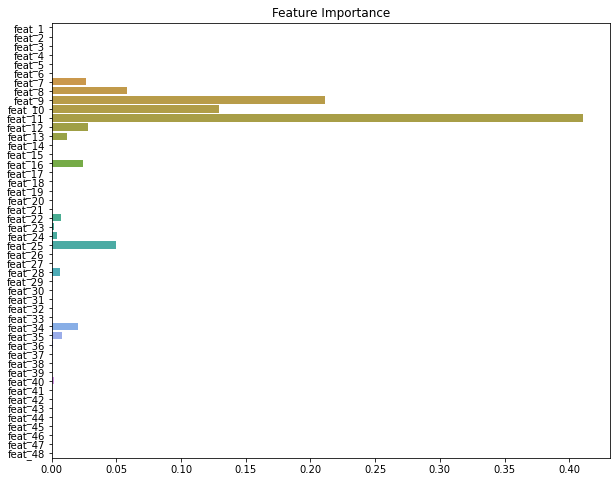

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=grid.best_estimator_.feature_importances_, y=X.columns)
plt.title("Feature Importance")
plt.show()

Predictions

In [ ]:
y_pred = grid.predict(X_test)

Confusion Matrix

In [ ]:
print("Confusion Matrix:\n")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Confusion Matrix:

[[ 951    0    0    0    0   65    0    0   58    0    0]
 [   0 1025    0    0    0   16    0    0    1   47    0]
 [   0    0  971    0   73    0    0    0    0    0    0]
 [   0    0   71  949   23    0    1    4    0    0    0]
 [   0    0   47    4  869    0    0  146    0    0    0]
 [  29    0   20    0    4  744    0    0  260    0    0]
 [   0    0    0    0    1    0 1102    0    0    0    0]
 [   0    0    7    6  387    1    0  628    0    0    0]
 [   7    4    1    0    1   51    0    0  948    0    0]
 [   0   36    0    0    0    1    0    0    0 1035    0]
 [   0    0    0    0    0    0    0    0    0    0 1108]]


Visulise Confusion Matrix

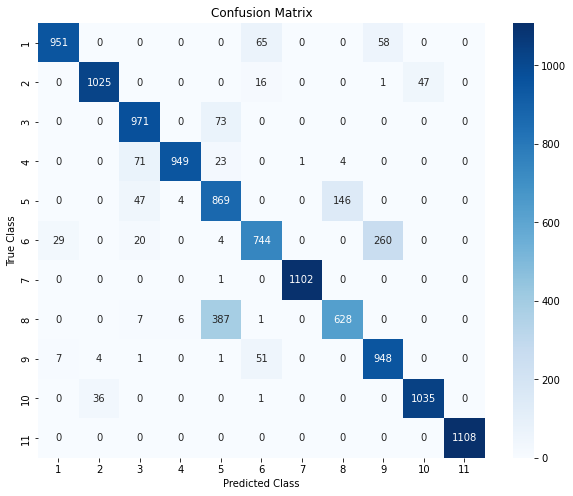

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=grid.best_estimator_.classes_, yticklabels=grid.best_estimator_.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()